In [17]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Set matplotlib as inline
%matplotlib inline 

In [18]:
import statsmodels.stats.api as sms

# Define parameters
effect_size = 0.1  # desired effect size
alpha = 0.05  # significance level (e.g., 0.05 for 95% confidence)
power = 0.8  # desired power (e.g., 0.8 for 80%)

# Calculate sample size
result = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1)

# Display the result
print(f"Required Sample Size: {round(result)}")

Required Sample Size: 1571


Control 3.38, treatment 4.29


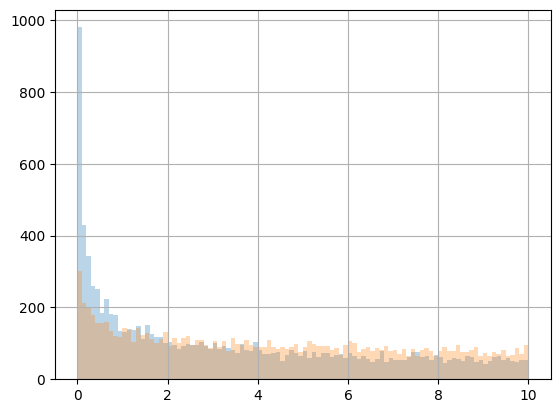

In [19]:
# Simulate two populations
population_size = 10000
population_control = pd.DataFrame()
population_control['dialogue_time'] = 10 * stats.powerlaw.rvs(0.5, size=population_size)

population_treatment = pd.DataFrame()
population_treatment['dialogue_time'] = 10 * stats.powerlaw.rvs(0.75, size=population_size)
# Plot
population_control['dialogue_time'].hist(bins=100, alpha=0.3)
population_treatment['dialogue_time'].hist(bins=100, alpha=0.3)

print("Control {:.2f}, treatment {:.2f}".format(population_control['dialogue_time'].mean(), population_treatment['dialogue_time'].mean()))



    The average dialogue time is 3.43 in control and 4.35 in treatment. Is that difference statistically significant?
    


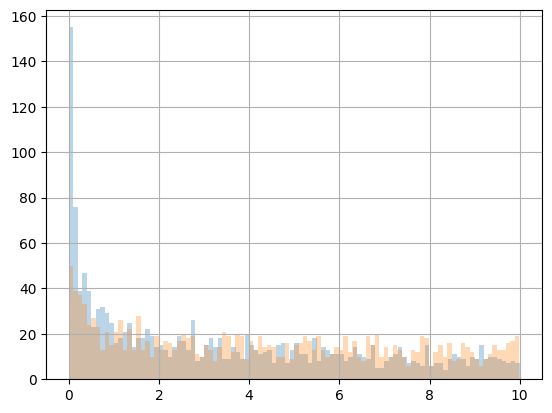

In [20]:
# Sampling
sample_size = 1571
sample_control = population_control.sample(n=sample_size)
sample_treatment = population_treatment.sample(n=sample_size)
sample_control['dialogue_time'].hist(bins=100, alpha=0.3)
sample_treatment['dialogue_time'].hist(bins=100, alpha=0.3)
print(
    """
    The average dialogue time is {:.2f} in control and {:.2f} in treatment. Is that difference statistically significant?
    """.format( 
        sample_control['dialogue_time'].mean(), 
        sample_treatment['dialogue_time'].mean()
    )
)

In [22]:
stats.ttest_ind(sample_control['dialogue_time'], sample_treatment['dialogue_time'], equal_var=False)

TtestResult(statistic=-8.538555636108143, pvalue=2.0854781614379488e-17, df=3139.944770594563)